# Principal Component Analysis (PCA)

When dealing with many features, often times there are some features that greatly contribute to our performance, and there are also some features that are not. PCA will create new features with based on the more important features

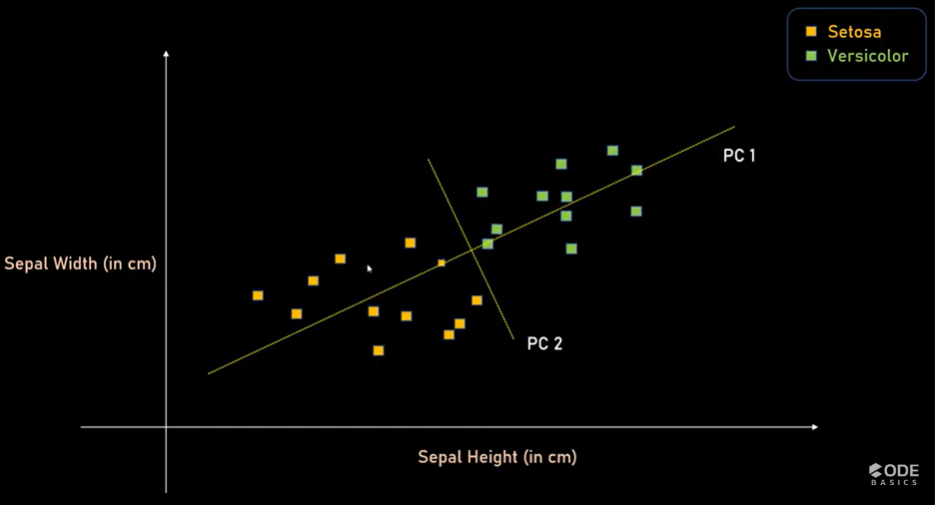

As dimensionality reduction technique All features that produces by the PCA will have high variations to split the data. PC1 will serve as base which has the highest split of the dataset (more selective). keep in mind:
- All data should be scale as unitless metrics
- As processing become faster, it pays its price by the accuracy that might drop.

In [94]:
import pandas as pd
from sklearn.datasets import load_digits

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [95]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [96]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

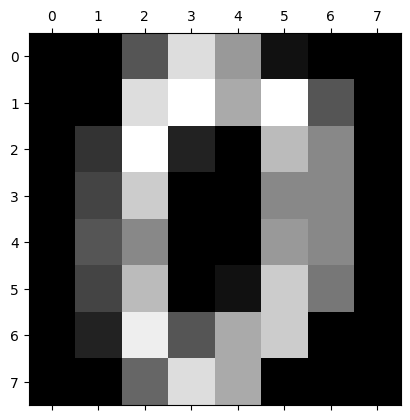

In [97]:
# try to plot the dataset example

from matplotlib import pyplot as plt

plt.figure()
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [98]:
import numpy as np

np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Example: check dataset to target

<Figure size 640x480 with 0 Axes>

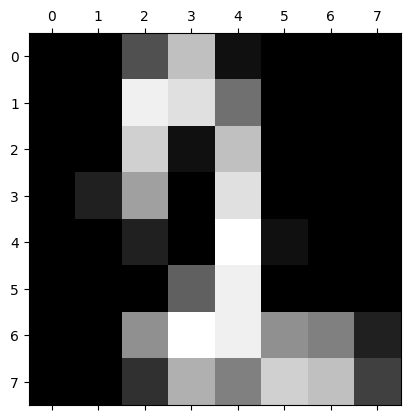

In [99]:
plt.figure()
plt.gray()
plt.matshow(dataset.data[12].reshape(8,8))

In [100]:
print(dataset.target[12])

2


In [101]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [102]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Having min and max value to be zero -> not so important pixels


In [103]:
X = df
y = dataset.target

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]], shape=(1797, 64))

In [105]:
from sklearn.model_selection import train_test_split

alpha = 0.2
seed_random = 30

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=alpha, random_state=seed_random)

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

## Use PCA

In [107]:
from sklearn.decomposition import PCA

# pca = PCA(n_components = 2) # How many feature that you want

pca = PCA(0.95) #retained the 95% of the useful features and create new dimension.

X_pca = pca.fit_transform(X)
X_pca.shape # (1797, 29) only 29 columns

(1797, 29)

In [108]:
X.shape # before

(1797, 64)

In [109]:
pca.explained_variance_ratio_ # How much variation 

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [110]:
print(pca.n_components_)

29


In [111]:
alpha = 0.2
seed_random = 30

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=alpha, random_state=seed_random)

In [112]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_pca, y_train_pca)
model.score(X_test_pca, y_test_pca)

0.9694444444444444

Using only 2 features

In [113]:
# pca = PCA(n_components=2)

# X_pca = pca.fit_transform(X)
# X_pca.shape # (1797, 2)

In [114]:
# pca.explained_variance_ratio_

In [115]:
# alpha = 0.2
# seed_random = 30

# X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=alpha, random_state=seed_random)

In [116]:
# model = LogisticRegression(max_iter = 1000)
# model.fit(X_train_pca, y_train_pca)
# model.score(X_test_pca, y_test_pca)

How much information that we saved ?

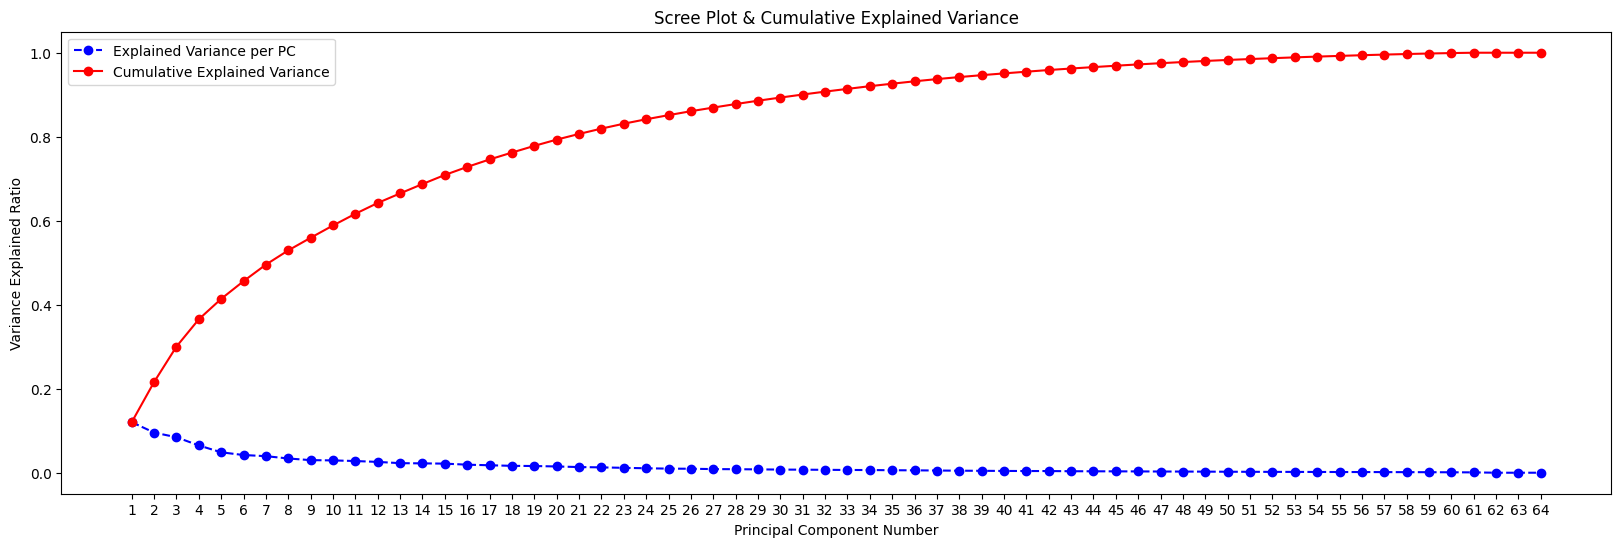

In [117]:
import matplotlib.pyplot as plt
import numpy as np

n_components_full = X.shape[1]
pca = PCA(n_components=n_components_full)
pca.fit(X_scaled)
subset = pca.explained_variance_ratio_

plt.figure(figsize=(20, 6))

components = range(1, len(subset) + 1)
cumulative_variance = np.cumsum(subset)

# Plot Explained Variance per Component
plt.plot(components, subset, marker='o', linestyle='--', color='b', label='Explained Variance per PC')
# Plot Cumulative Explained Variance
plt.plot(components, cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')

plt.title('Scree Plot & Cumulative Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance Explained Ratio')
plt.xticks(components)
plt.legend()

plt.savefig('../result/pca_scree_plot.png')

plt.show()


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


n_features = X_scaled.shape[1] 
components_range = range(1, n_features + 1)

# Inisialisasi list untuk menyimpan hasil
accuracy_scores = []
training_times = []

# Model yang akan digunakan (ganti jika Anda menggunakan model lain)
model = LogisticRegression(max_iter = 1000)
alpha = 0.2
seed_random = 30

# Iterasi pada jumlah komponen PCA yang berbeda
for k in components_range:
    # 1. Terapkan PCA
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)
    
    # 2. Split Data
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(
        X_pca, y, test_size=alpha, random_state=seed_random
    )
    
    # 3. Catat Waktu Pelatihan dan Latih Model
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    
    # 4. Catat Akurasi
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Simpan Hasil
    accuracy_scores.append(accuracy)
    training_times.append(end_time - start_time)

print("Akurasi: ", accuracy_scores)
print("Waktu Pelatihan (detik): ", training_times)

Akurasi:  [0.3388888888888889, 0.5666666666666667, 0.7111111111111111, 0.7888888888888889, 0.8055555555555556, 0.8111111111111111, 0.8472222222222222, 0.8694444444444445, 0.8722222222222222, 0.8777777777777778, 0.8944444444444445, 0.8944444444444445, 0.9083333333333333, 0.9305555555555556, 0.9444444444444444, 0.9388888888888889, 0.9472222222222222, 0.95, 0.9527777777777777, 0.9472222222222222, 0.9444444444444444, 0.9472222222222222, 0.9472222222222222, 0.9472222222222222, 0.95, 0.9527777777777777, 0.9555555555555556, 0.9555555555555556, 0.9611111111111111, 0.9638888888888889, 0.9638888888888889, 0.9583333333333334, 0.9555555555555556, 0.9555555555555556, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9611111111111111, 0.9611111111111111, 0.9638888888888889, 0.9638888888888889, 0.9638888888888889, 0.9583333333333334, 0.9611111111111111, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9722222222222222, 0.9666666666666667, 0.966666666666666

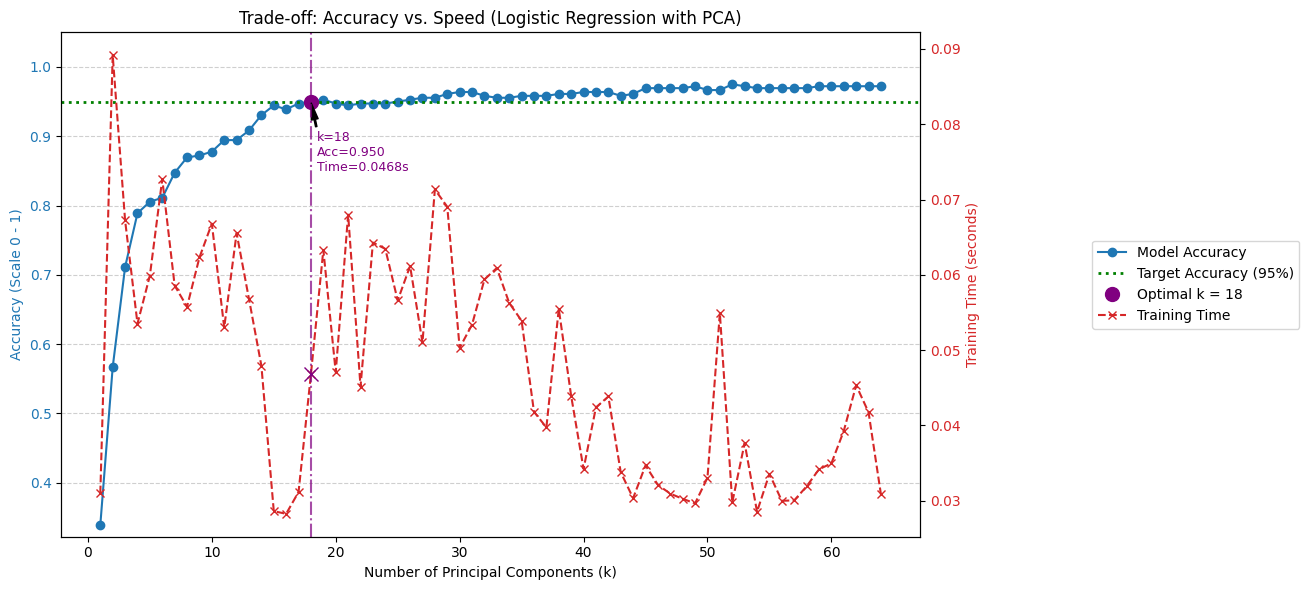

In [119]:
# Define the Target Accuracy constant
TARGET_ACCURACY = 0.95

# --- 1. Find the Smallest 'k' that Meets the Target Accuracy ---
indices_met_target = np.where(np.array(accuracy_scores) >= TARGET_ACCURACY)[0]

found_optimal = False
if len(indices_met_target) > 0:
    # Take the index of the first (smallest) k that meets the target
    k_optimal_index = indices_met_target[0] 
    # Calculate the corresponding k value
    k_optimal_value = components_range[k_optimal_index]
    optimal_time = training_times[k_optimal_index]
    optimal_acc = accuracy_scores[k_optimal_index]
    found_optimal = True
else:
    print("Warning: The target accuracy of 80% was not achieved in this experiment.")


# --- 2. Create the Dual-Axis Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Plot Accuracy (Left Y-axis) ---
color_acc = 'tab:blue'
ax1.set_xlabel('Number of Principal Components (k)')
ax1.set_ylabel('Accuracy (Scale 0 - 1)', color=color_acc)
ax1.plot(components_range, accuracy_scores, color=color_acc, marker='o', linestyle='-', label='Model Accuracy')
ax1.tick_params(axis='y', labelcolor=color_acc)
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)

# Add the Target Accuracy Line (80%)
ax1.axhline(y=TARGET_ACCURACY, color='green', linestyle=':', linewidth=2, label=f'Target Accuracy ({TARGET_ACCURACY*100:.0f}%)')
# Set Y limit to better visualize the 80% line
ax1.set_ylim(min(accuracy_scores) * 0.95, 1.05) 

# --- Plot Computation Time (Right Y-axis) ---
ax2 = ax1.twinx() # Create a second Y-axis sharing the same X-axis
color_time = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color_time)
ax2.plot(components_range, training_times, color=color_time, marker='x', linestyle='--', label='Training Time')
ax2.tick_params(axis='y', labelcolor=color_time)

# --- 3. Mark the Optimal Trade-off Point ---
if found_optimal:
    # Vertical line marking the optimal k
    plt.axvline(x=k_optimal_value, color='purple', linestyle='-.', alpha=0.7)
    
    # Annotate the optimal k point on the plot
    ax1.plot(k_optimal_value, optimal_acc, 'o', color='purple', markersize=10, label=f'Optimal k = {k_optimal_value}')
    ax2.plot(k_optimal_value, optimal_time, 'x', color='purple', markersize=10)

    # Add text annotation for clarity
    ax1.annotate(f'k={k_optimal_value}\nAcc={optimal_acc:.3f}\nTime={optimal_time:.4f}s', 
                 xy=(k_optimal_value, optimal_acc), 
                 xytext=(k_optimal_value + 0.5, optimal_acc - 0.1), 
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 fontsize=9, color='purple')


# --- Title and Legends ---
plt.title('Trade-off: Accuracy vs. Speed (Logistic Regression with PCA)')
fig.tight_layout()

# Combine all legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(1.45, 0.5))

plt.savefig('../result/pca_performance.png')

plt.show()